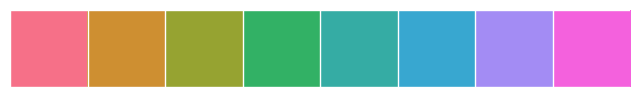

In [1]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
colorz=sns.color_palette("husl", 8)
sns.palplot(sns.color_palette("husl", 8))
import matplotlib.gridspec as gridspec

In [2]:
# data from EPA 1/4 - 1/23 noon
epa_queens=pd.read_excel('/Users/stella/Desktop/data/Queens Data_010417_012317.xls')[3:28084]
epa_queens=epa_queens.rename(index=str, columns={
                                      "SiteReport - Site Queens College Report : TimeBeginning": "Datetime",
                                      "Unnamed: 1": "PM2.5_MC (ug/m3)",
                                      "Unnamed: 2": "PM2.5_FEM_MC (ug/m3)",
                                      "Unnamed: 3": "PM2.5_Ref_Mass (ug/m3)",
                                      "Unnamed: 4": "PM10_MC (ug/m3)",
                                      "Unnamed: 5": "Ultrafine (#/cm3)"})
epa_queens['Datetime']=epa_queens['Datetime'].apply(lambda x: parse(x))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/stella/Desktop/data/Queens Data_010417_012317.xls'

In [ ]:
aqu=pd.read_csv('/Users/stella/Desktop/data/1329_PEGASOR A_20170206150115.csv')
aqu['DateTime']=aqu['DateTime'].apply(lambda x: parse(x))
aqu=aqu.rename(index=str, columns={ "MEASURE_PA_LABEL":"ldsa",
                                    "MEASURE_MG_LABEL":"num",
                                    "MEASURE_N_LABEL":"pm25",
                                           
                                    "MEASURE_PA_LABEL.1":"ldsa-1",
                                    "MEASURE_MG_LABEL.1":"num-1",
                                    "MEASURE_N_LABEL.1":"pm25-1",
                                           
                                    "MEASURE_PA_LABEL.2":"ldsa-2",
                                    "MEASURE_MG_LABEL.2":"num-2",
                                    "MEASURE_N_LABEL.2":"pm25-2",})

In [613]:
aqi=pd.read_excel('/Users/stella/Desktop/data/pm25-aqi-jan4-jan23.xlsx',sheetname=1)
aqi_ldsa=pd.read_excel('/Users/stella/Desktop/data/pm25-aqi-jan4-jan23.xlsx',sheetname=0)

In [614]:
print(epa_queens.columns)
print(aqu.columns)
print(aqi.columns)
print(aqi_ldsa.columns)

Index(['Datetime', 'PM2.5_MC (ug/m3)', 'PM2.5_FEM_MC (ug/m3)',
       'PM2.5_Ref_Mass (ug/m3)', 'PM10_MC (ug/m3)', 'Ultrafine (#/cm3)'],
      dtype='object')
Index(['DateTime', 'ldsa', 'num', 'pm25', 'ldsa-1', 'num-1', 'pm25-1',
       'ldsa-2', 'num-2', 'pm25-2'],
      dtype='object')
Index(['time', 'value (µg/m³)'], dtype='object')
Index(['time', 'value (µm²/cm³)'], dtype='object')


In [615]:
epa_queens=epa_queens.set_index('Datetime')
aqu=aqu.set_index('DateTime')
aqi=aqi.set_index('time')
aqi_ldsa=aqi_ldsa.set_index('time')

In [616]:
df=epa_queens.join(aqu)
df2=df.join(aqi)
df2=df2.join(aqi_ldsa)
df2=df2.dropna()
df2=df2.reset_index()
df2=df2.rename(index=str,columns={"index":"datetime"})
df2=df2.rename(index=str,columns={"value (\u00B5g/m\u00B3)":"aqi pm25 (ug/m3)"})
df2.head(1)

,datetime,PM2.5_MC (ug/m3),PM2.5_FEM_MC (ug/m3),PM2.5_Ref_Mass (ug/m3),PM10_MC (ug/m3),Ultrafine (#/cm3),ldsa,num,pm25,ldsa-1,num-1,pm25-1,ldsa-2,num-2,pm25-2,aqi pm25 (ug/m3),value (µm²/cm³)
0,2017-01-04 15:02:00,0.37,0.26,1.71,3.6,17800,4.499,3684.353,0.177,4.542,3308.769,0.159,4.794,3982.353,0.191,3.003132,7.510291


In [617]:
df3=df2.copy(False)re

In [618]:
del df3['PM10_MC (ug/m3)'];del df3['Ultrafine (#/cm3)']
del df3['num'];del df3['num-1'];del df3['num-2']

In [619]:
del df3['PM2.5_MC (ug/m3)']
del df3['PM2.5_FEM_MC (ug/m3)']
del df3['PM2.5_Ref_Mass (ug/m3)']

In [620]:
del df3['pm25']; del df3['pm25-1']; del df3['pm25-2']
del df3['aqi pm25 (ug/m3)']

In [621]:
df3=df3.rename(columns={'value (µm²/cm³)':'ldsa-indoor'})

In [622]:
df3=df3[(df3['ldsa']>0) & (df3['ldsa-1']>0) & (df3['ldsa-2']>0) & (df3['ldsa-indoor']>0)]

In [623]:
df4=df3.copy(False)

In [624]:
df3=df3[df3['datetime']>datetime.datetime(2017,1,5)]

In [625]:
df3=df3.reset_index()

In [626]:
del df3['index']

In [639]:
df3['urb-avg']=(df3['ldsa']+df3['ldsa-1']+df3['ldsa-2'])/3
(df3['ldsa-indoor']/df3['urb-avg']).mean()

0.2703019156731032

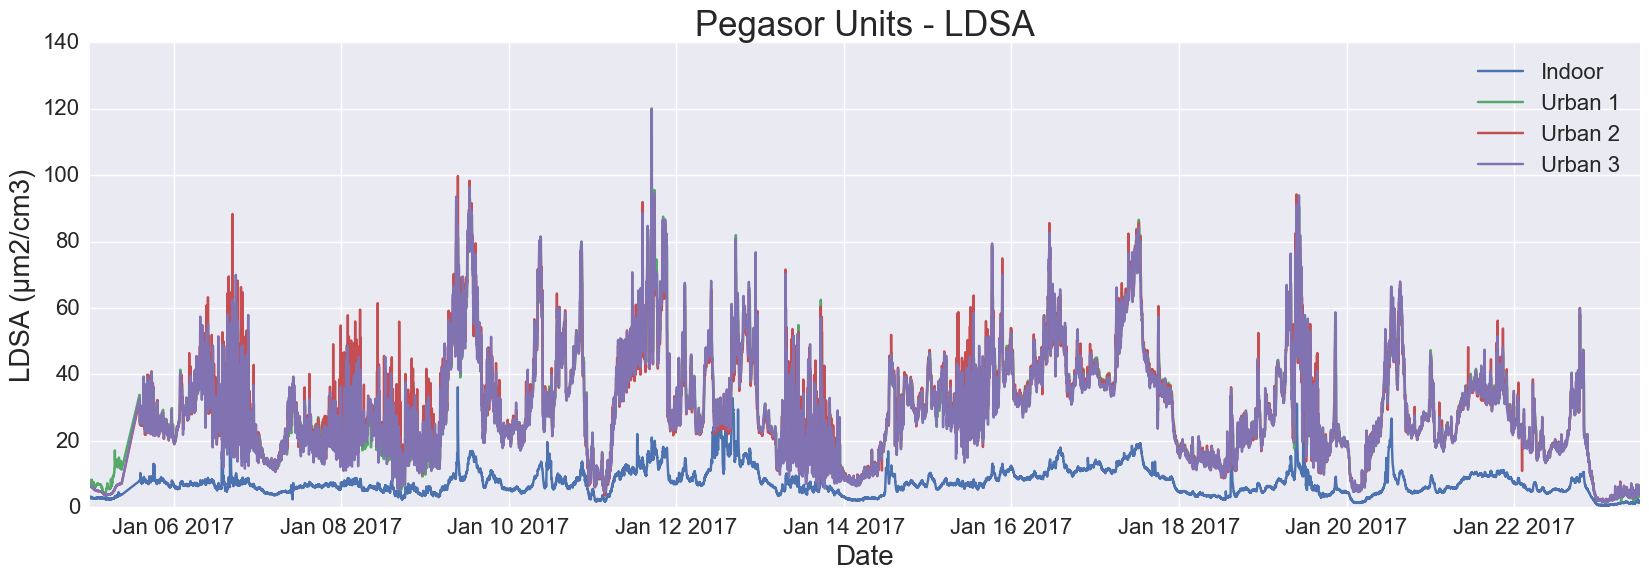

In [240]:
plt.figure(figsize=(20,6))
plt.title('Pegasor Units - LDSA', fontsize=25)
plt.plot(df3['datetime'],df3['ldsa-indoor'],'-',label='Indoor')
plt.plot(df3['datetime'],df3['ldsa'],'-',label='Urban 1')
plt.plot(df3['datetime'],df3['ldsa-1'],'-',label='Urban 2')
plt.plot(df3['datetime'],df3['ldsa-2'],'-',label='Urban 3')
plt.xlabel('Date',fontsize=20)
plt.ylabel('LDSA (µm2/cm3)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.savefig('/Users/stella/Desktop/2-io-queens-jan.png')

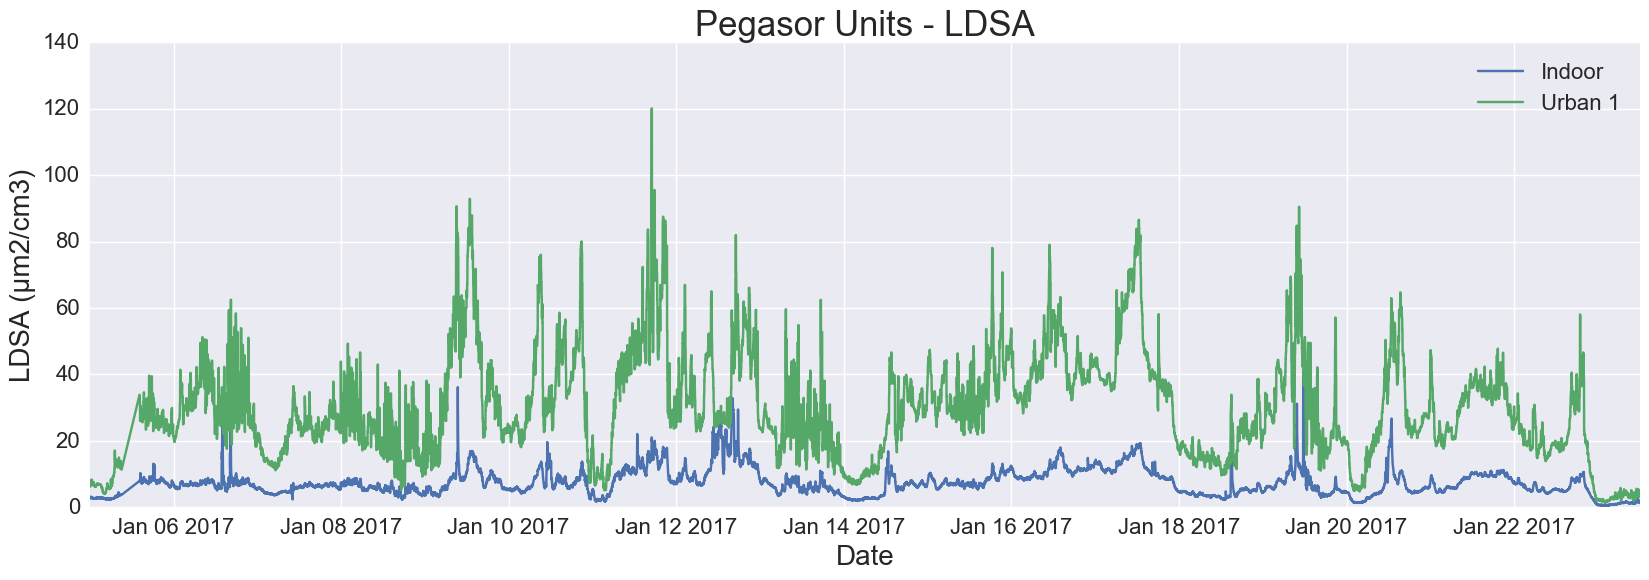

In [241]:
plt.figure(figsize=(20,6))
plt.title('Pegasor Units - LDSA', fontsize=25)
plt.plot(df3['datetime'],df3['ldsa-indoor'],'-',label='Indoor')
plt.plot(df3['datetime'],df3['ldsa'],'-',label='Urban 1')
#plt.plot(df3['datetime'],df3['ldsa-1'],'-',label='Urban 2')
#plt.plot(df3['datetime'],df3['ldsa-2'],'-',label='Urban 3')
plt.xlabel('Date',fontsize=20)
plt.ylabel('LDSA (µm2/cm3)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.savefig('/Users/stella/Desktop/2-io-queens-jan-one.png')

In [215]:
x=df3['ldsa']
y=df3['ldsa-1']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.923415745074


In [217]:
x=df3['ldsa']
y=df3['ldsa-2']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.91867315792


In [216]:
x=df3['ldsa-1']
y=df3['ldsa-2']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.955748892612


In [223]:
df3[(df3['ldsa-indoor']>df3['ldsa']) & (df3['ldsa-indoor']>df3['ldsa-1']) & (df3['ldsa-indoor']>df3['ldsa-2'])]

,datetime,ldsa,ldsa-1,ldsa-2,ldsa-indoor
20495,2017-01-19 11:36:00,41.873,32.721,33.798,42.278736
20496,2017-01-19 11:37:00,39.700,37.774,33.798,40.745930


In [224]:
len(df3[(df3['ldsa-indoor']>df3['ldsa']) | (df3['ldsa-indoor']>df3['ldsa-1']) | (df3['ldsa-indoor']>df3['ldsa-2'])])

18

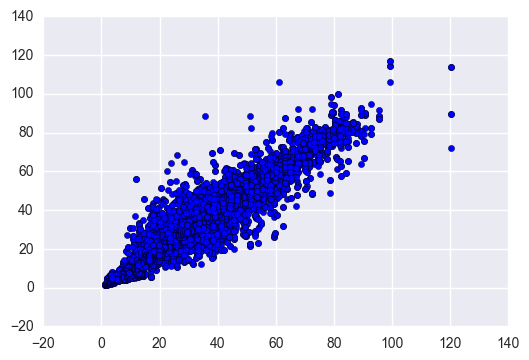

In [70]:
plt.scatter(df3['ldsa'],df3['ldsa-1'])

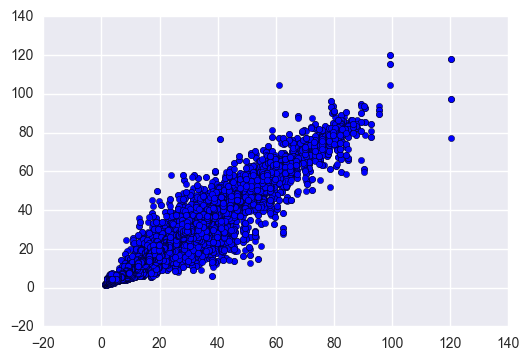

In [71]:
plt.scatter(df3['ldsa'],df3['ldsa-2'])

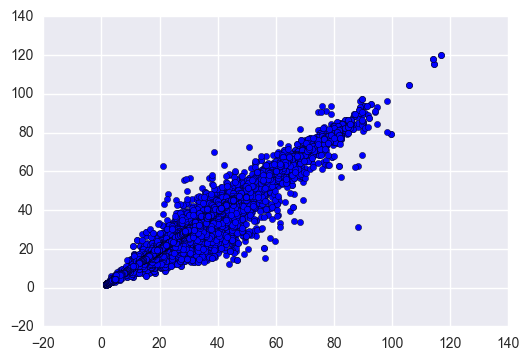

In [72]:
plt.scatter(df3['ldsa-1'],df3['ldsa-2'])

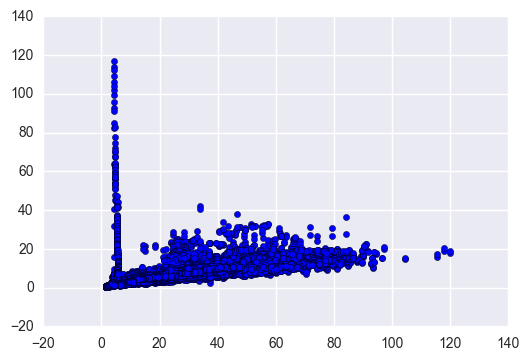

In [79]:
plt.scatter(df3['ldsa-2'],df3['ldsa-indoor'])

In [89]:
df4=df3[(df3['ldsa-indoor']>df3['ldsa']) & (df3['ldsa-indoor']<50)]

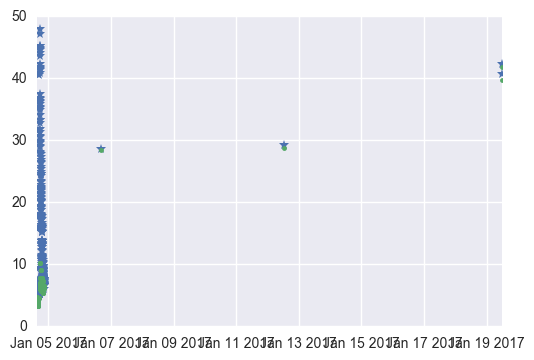

In [90]:
plt.plot(df4['datetime'],df4['ldsa-indoor'],'*')
plt.plot(df4['datetime'],df4['ldsa'],'.')

In [318]:
del df2['PM2.5_FEM_MC (ug/m3)'], df2['PM2.5_MC (ug/m3)'], df2['PM10_MC (ug/m3)']
del df2['PM2.5_Ref_Mass (ug/m3)'], df2['ldsa'], df2['ldsa-1'], df2['ldsa-2']
del df2['pm25'], df2['pm25-1'], df2['pm25-2']
del df2['aqi pm25 (ug/m3)'], df2['value (µm²/cm³)']

In [227]:
#plt.plot(df2['datetime'],df2['Ultrafine (#/cm3)'])
#plt.plot(df2['datetime'],df2['num'])

In [319]:
df2=df2[(df2['num']>0) & (df2['num-1']>0) & (df2['num-2']>0)]

In [320]:
df2=df2[df2['datetime']>datetime.datetime(2017,1,5)]

In [321]:
df2=df2[df2['Ultrafine (#/cm3)']!='---']2

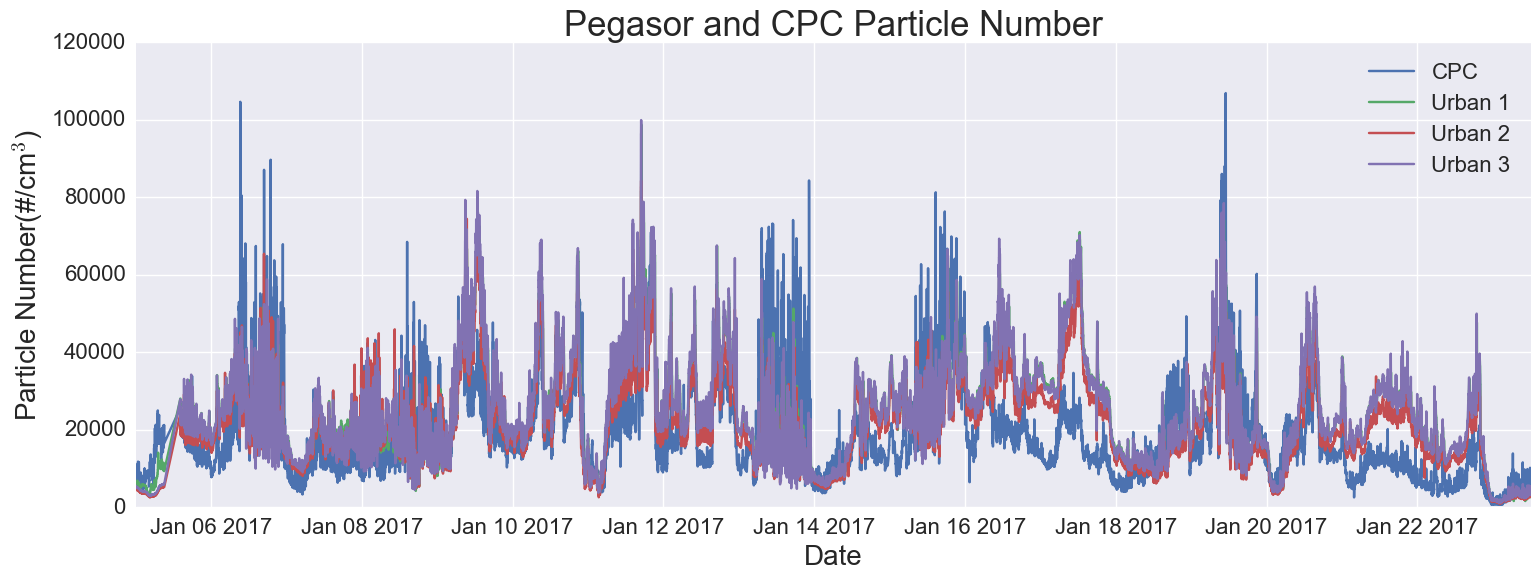

In [322]:
plt.figure(figsize=(18,6))
plt.plot(df2['datetime'],df2['Ultrafine (#/cm3)'],label='CPC')
plt.plot(df2['datetime'],df2['num'],label='Urban 1')
plt.plot(df2['datetime'],df2['num-1'],label='Urban 2')
plt.plot(df2['datetime'],df2['num-2'],label='Urban 3')
plt.title('Pegasor and CPC Particle Number', fontsize=25)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Particle Number(#/cm$^3$)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.savefig('/Users/stella/Desktop/cpc-peg-pn.png')

In [334]:
test=df2.copy(False)

In [341]:
#test['urban avg']=
test.mean()

num      24635.495374
num-1    21393.533740
num-2    24311.757136
dtype: float64

In [371]:
df2.head()
#df2['urban-avg']=(df2['num'],df2['num-1']).apply(lambda x, y: np.mean([x,y]))
#np.mean([2,2])

df2['urban-avg'] = (df2['num']+df2['num-1']+df2['num-2'])/3

In [413]:
df2['bin-cpc']=df2['Ultrafine (#/cm3)'].apply(lambda x: x/10000)

In [387]:
df2['bin-urb']=df2['urban-avg'].apply(lambda x: np.int(str(x)[0]))

In [411]:
df2.head()

,datetime,Ultrafine (#/cm3),num,num-1,num-2,urban-avg,bin-cpc,bin-urb
542,2017-01-05 00:01:00,8215,6319.262,4868.934,5618.536,5602.244000,8.215,5
543,2017-01-05 00:02:00,8365,6319.262,4868.934,5618.536,5602.244000,8.365,5
544,2017-01-05 00:03:00,8965,6319.262,4835.798,5597.211,5584.090333,8.965,5
545,2017-01-05 00:04:00,9125,5995.520,4835.798,5597.211,5476.176333,9.125,5
546,2017-01-05 00:05:00,9235,5995.520,4785.100,5540.714,5440.444667,9.235,5


(array([      0.,   20000.,   40000.,   60000.,   80000.,  100000.,  120000.]),
 <a list of 7 Text yticklabel objects>)

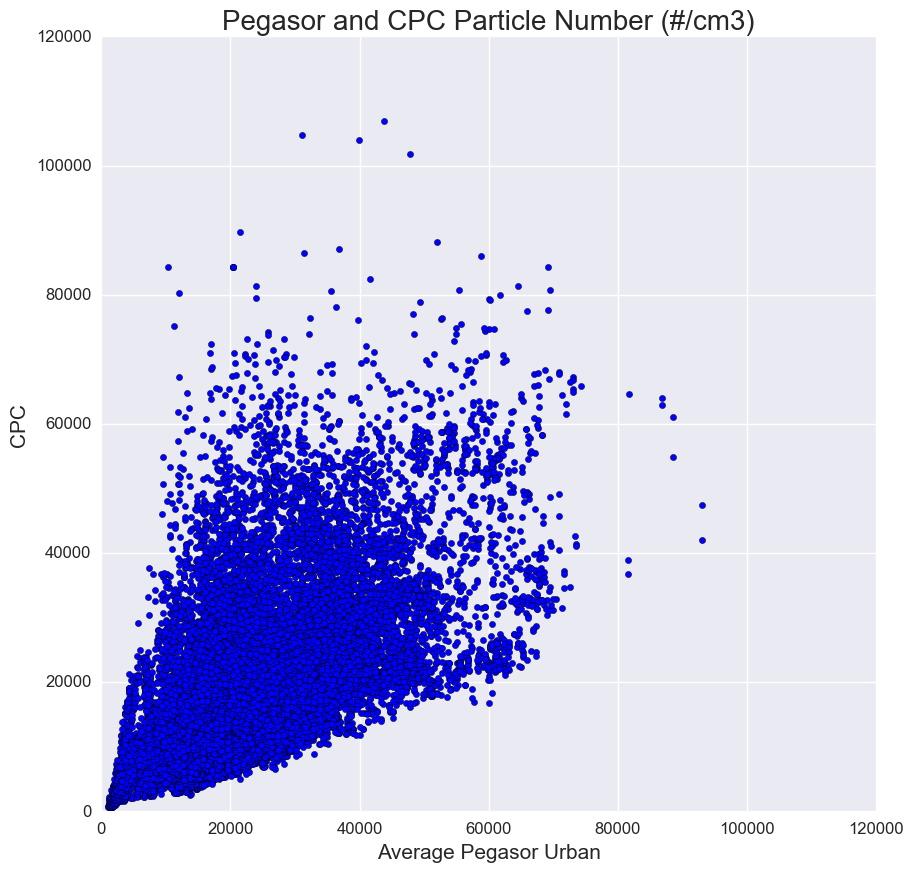

In [416]:
plt.figure(figsize=(10,10))
#plt.scatter(df2['urban-avg'],df2['Ultrafine (#/cm3)'],c=df2['bin-cpc'])
plt.scatter(df2['urban-avg'],df2['Ultrafine (#/cm3)'])
plt.title('Pegasor and CPC Particle Number (#/cm3)', fontsize=20)
plt.ylabel('CPC',fontsize=15); plt.xlabel('Average Pegasor Urban',fontsize=15)
plt.xlim([0,120000]);plt.ylim([0,120000])
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
#plt.colorbar(label='CPC Size Bin (1e4/cm3)')
#plt.savefig('/Users/stella/Desktop/cpc-peg-pn.png')

r-squared: 0.35554563106


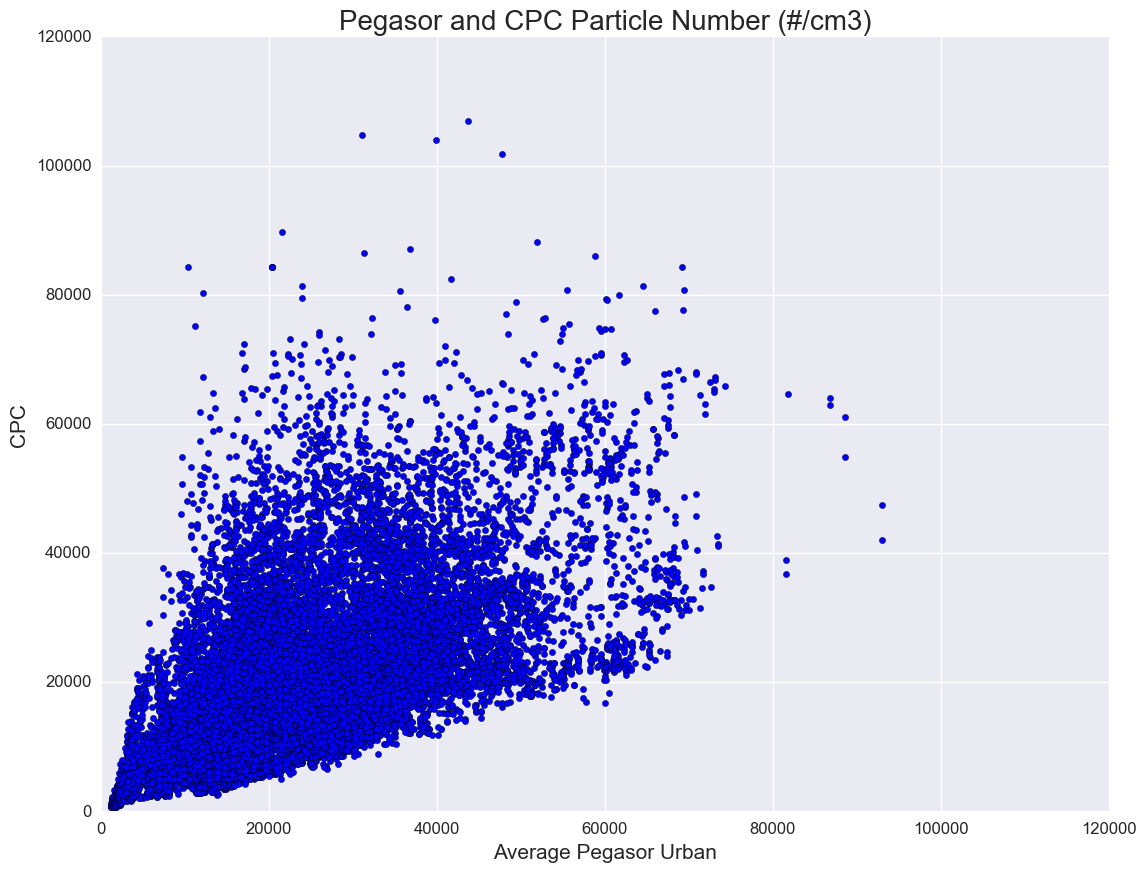

In [534]:
plt.figure(figsize=(13,10))
plt.scatter(df2['urban-avg'],df2['Ultrafine (#/cm3)'])
plt.title('Pegasor and CPC Particle Number (#/cm3)', fontsize=20)
plt.ylabel('CPC',fontsize=15); plt.xlabel('Average Pegasor Urban',fontsize=15)
plt.xlim([0,120000]);plt.ylim([0,120000])
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
#plt.savefig('/Users/stella/Desktop/cpc-peg-pn.png')


x=df2['urban-avg']; y=df2['Ultrafine (#/cm3)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

In [423]:
test=df2.copy(False)

In [425]:
del test['num'], test['num-1'], test['num-2']
del test['bin-cpc'], test['bin-urb']

In [502]:
x=0; y=20000
test1=test[(test['Ultrafine (#/cm3)']>x) & (test['Ultrafine (#/cm3)']<=y) & (test['urban-avg']>x) & (test['urban-avg']<=y)]

In [503]:
x=20000; y=40000
test2=test[(test['Ultrafine (#/cm3)']>x) & (test['Ultrafine (#/cm3)']<=y) & (test['urban-avg']>x) & (test['urban-avg']<=y)]

In [504]:
x=40000; y=60000
test3=test[(test['Ultrafine (#/cm3)']>x) & (test['Ultrafine (#/cm3)']<=y) & (test['urban-avg']>x) & (test['urban-avg']<=y)]

In [505]:
x=60000; y=80000
test4=test[(test['Ultrafine (#/cm3)']>x) & (test['Ultrafine (#/cm3)']<=y) & (test['urban-avg']>x) & (test['urban-avg']<=y)]

In [506]:
x=80000; y=100000
test5=test[(test['Ultrafine (#/cm3)']>x) & (test['Ultrafine (#/cm3)']<=y) & (test['urban-avg']>x) & (test['urban-avg']<=y)]

In [508]:
len(test1), len(test2), len(test3), len(test4), len(test5)

(9705, 4315, 484, 41, 0)

r-squared: 0.258867642896


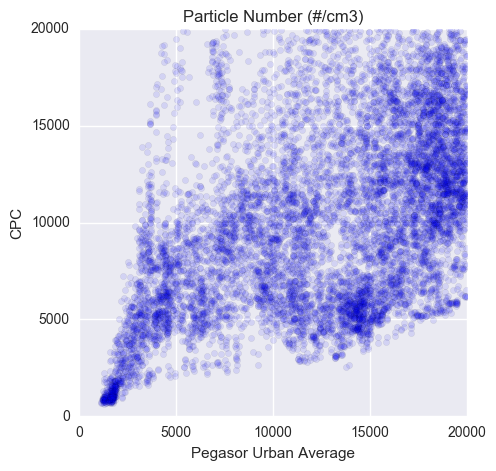

In [586]:
plt.figure(figsize=(5,5))
plt.ylim([0,20000]);plt.xlim([0,20000])
plt.xlabel('Pegasor Urban Average')
plt.ylabel('CPC')
plt.title('Particle Number (#/cm3)')
plt.scatter(test1['urban-avg'],test1['Ultrafine (#/cm3)'],alpha=0.1)

x=test1['urban-avg']; y=test1['Ultrafine (#/cm3)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.00602939449055


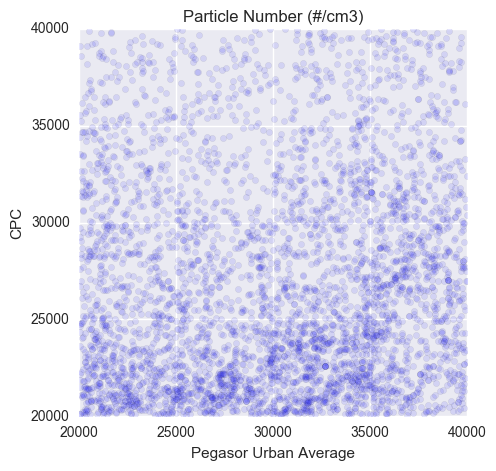

In [587]:
plt.figure(figsize=(5,5))
plt.ylim([20000,40000]);plt.xlim([20000,40000])
plt.xlabel('Pegasor Urban Average')
plt.ylabel('CPC')
plt.title('Particle Number (#/cm3)')
plt.scatter(test2['urban-avg'],test2['Ultrafine (#/cm3)'],alpha=0.1)

x=test2['urban-avg']; y=test2['Ultrafine (#/cm3)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.0650081729643


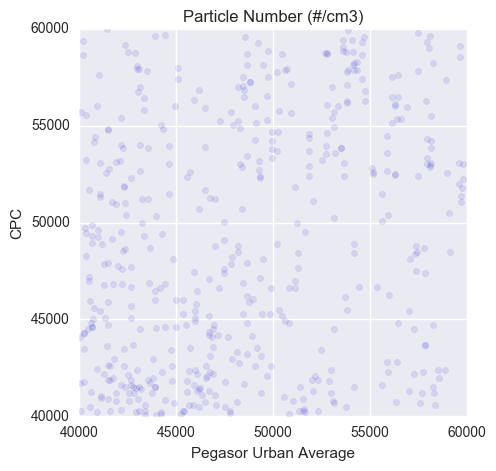

In [588]:
plt.figure(figsize=(5,5))
plt.ylim([40000,60000]);plt.xlim([40000,60000])
plt.xlabel('Pegasor Urban Average')
plt.ylabel('CPC')
plt.title('Particle Number (#/cm3)')
plt.scatter(test3['urban-avg'],test3['Ultrafine (#/cm3)'],alpha=0.1)

x=test3['urban-avg']; y=test3['Ultrafine (#/cm3)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.0313793512882


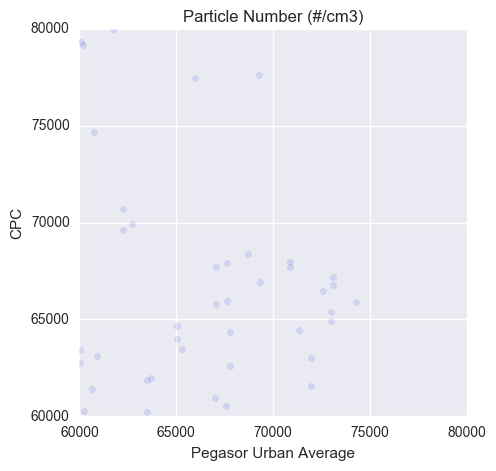

In [589]:
plt.figure(figsize=(5,5))
plt.ylim([60000,80000]);plt.xlim([60000,80000])
plt.xlabel('Pegasor Urban Average')
plt.ylabel('CPC')
plt.title('Particle Number (#/cm3)')
plt.scatter(test4['urban-avg'],test4['Ultrafine (#/cm3)'],alpha=0.1)

x=test4['urban-avg']; y=test4['Ultrafine (#/cm3)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

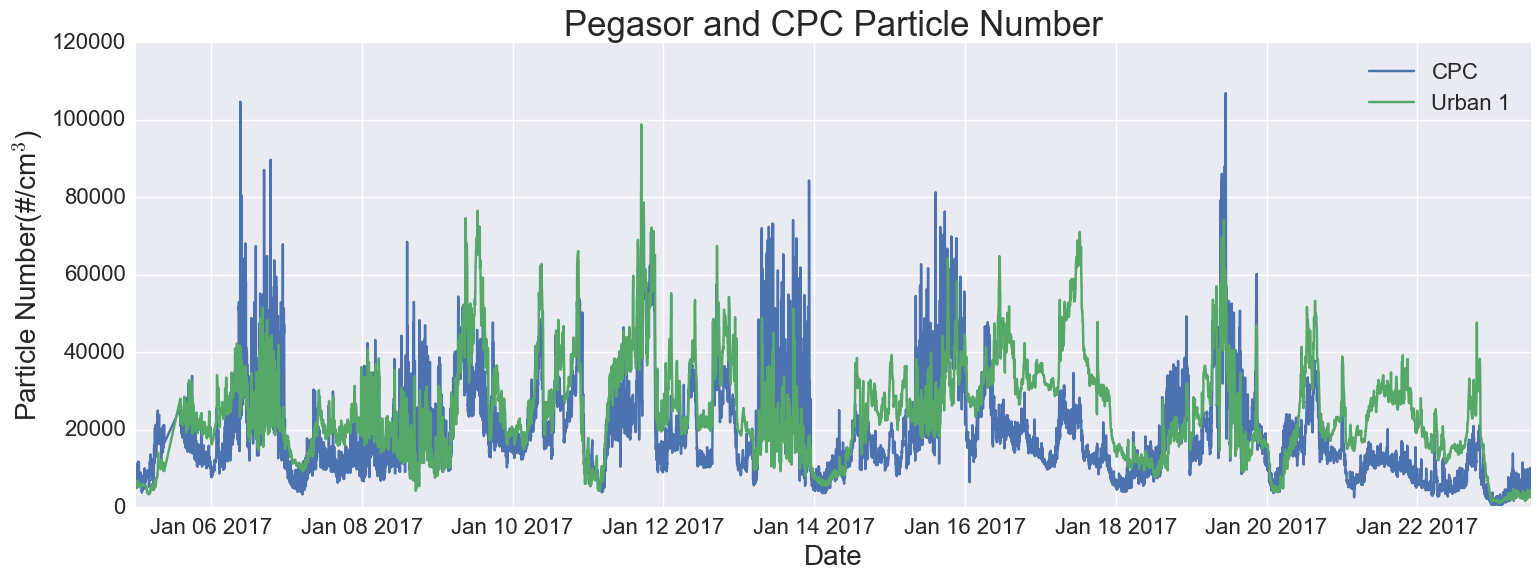

In [238]:
plt.figure(figsize=(18,6))
plt.plot(df2['datetime'],df2['Ultrafine (#/cm3)'],label='CPC')
plt.plot(df2['datetime'],df2['num'],label='Urban 1')
#plt.plot(df2['datetime'],df2['num-1'],label='Urban 2')
#plt.plot(df2['datetime'],df2['num-2'],label='Urban 3')
plt.title('Pegasor and CPC Particle Number', fontsize=25)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Particle Number(#/cm$^3$)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.savefig('/Users/stella/Desktop/cpc-peg-pn-one.png')

In [121]:
from scipy import stats
#>>> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
#>>> print("r-squared:", r_value**2)

In [125]:
x=df2['Ultrafine (#/cm3)']
y=df2['num']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.352149846629


In [126]:
x=df2['Ultrafine (#/cm3)']
y=df2['num-1']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.364188275523


In [127]:
x=df2['Ultrafine (#/cm3)']
y=df2['num-2']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.327524657713


In [128]:
x=df2['num']
y=df2['num-1']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.918148419338


In [129]:
x=df2['num']
y=df2['num-2']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.918141743743


In [130]:
x=df2['num-1']
y=df2['num-2']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.950571323537


In [136]:
#pd.rolling_mean(arg, window, min_periods=None, freq=None, center=False, how=None, **kwargs)
#pd.rolling_mean(df2, 15)

In [138]:
df3=df2.set_index('datetime')

In [152]:
avg=pd.rolling_mean(df3, 15, center=True).reset_index()

/Users/stella/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=True,window=15).mean()
  if __name__ == '__main__':


In [157]:
avg=avg[7:].reset_index()

In [159]:
del avg['index']

In [171]:
avg=avg[:26259]

In [174]:
x=avg['Ultrafine (#/cm3)']
y=avg['num']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.406612446479


In [175]:
x=avg['Ultrafine (#/cm3)']
y=avg['num-1']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.412137484391


In [176]:
x=avg['Ultrafine (#/cm3)']
y=avg['num-2']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.367127609985


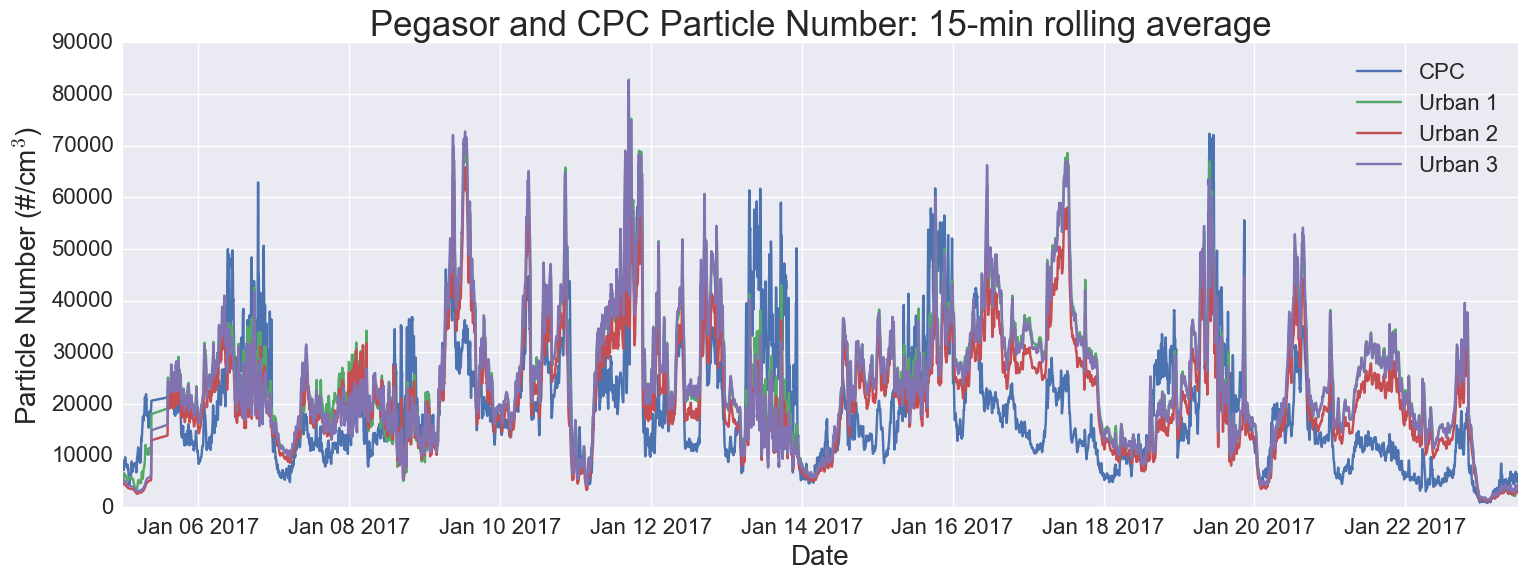

In [266]:
plt.figure(figsize=(18,6))
plt.plot(avg['datetime'],avg['Ultrafine (#/cm3)'],label='CPC')
plt.plot(avg['datetime'],avg['num'],label='Urban 1')
plt.plot(avg['datetime'],avg['num-1'],label='Urban 2')
plt.plot(avg['datetime'],avg['num-2'],label='Urban 3')
plt.title('Pegasor and CPC Particle Number: 15-min rolling average', fontsize=25)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Particle Number (#/cm$^3$)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.savefig('/Users/stella/Desktop/cpc-peg-pn-avg.png')

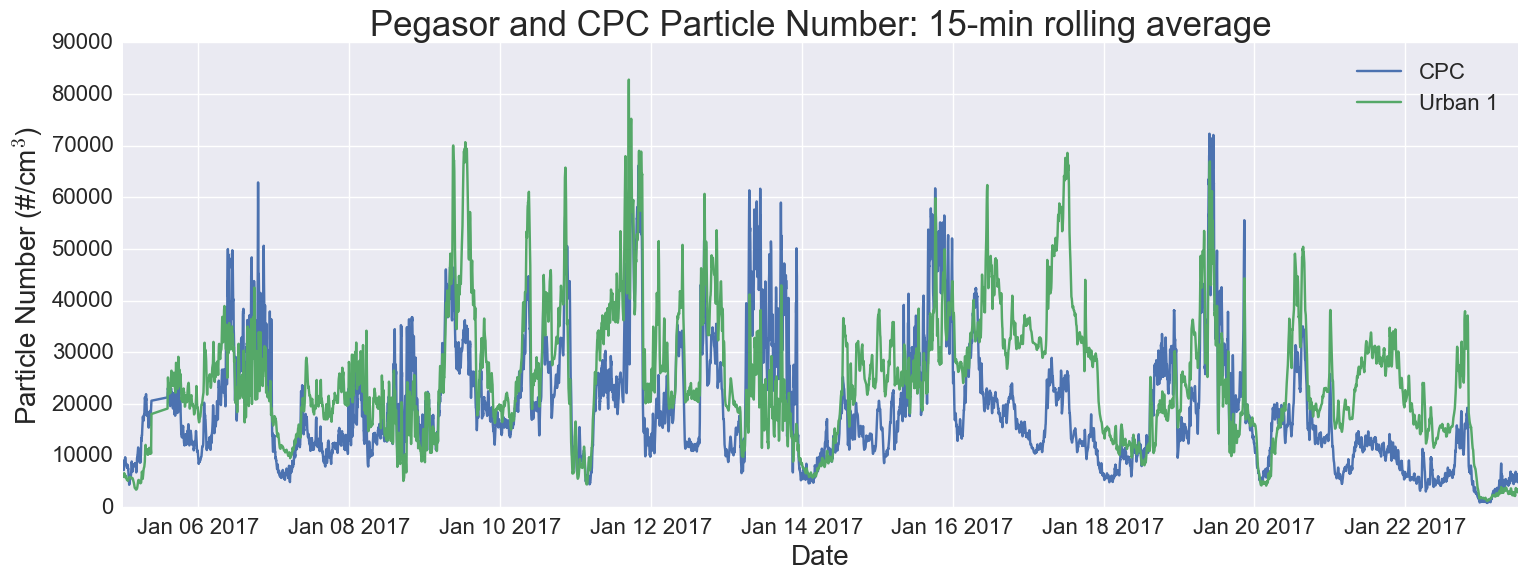

In [265]:
plt.figure(figsize=(18,6))
plt.plot(avg['datetime'],avg['Ultrafine (#/cm3)'],label='CPC')
plt.plot(avg['datetime'],avg['num'],label='Urban 1')
#plt.plot(avg['datetime'],avg['num-1'],label='Urban 2')
#plt.plot(avg['datetime'],avg['num-2'],label='Urban 3')
plt.title('Pegasor and CPC Particle Number: 15-min rolling average', fontsize=25)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Particle Number (#/cm$^3$)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.savefig('/Users/stella/Desktop/cpc-peg-pn-one.png')

In [219]:
df3.head()

,datetime,ldsa,ldsa-1,ldsa-2,ldsa-indoor
0,2017-01-05 00:01:00,7.685,6.664,6.747,2.961457
1,2017-01-05 00:02:00,7.685,6.664,6.747,3.069128
2,2017-01-05 00:03:00,7.685,6.617,6.720,3.066947
3,2017-01-05 00:04:00,7.288,6.617,6.720,3.129606
4,2017-01-05 00:05:00,7.288,6.544,6.648,2.965563


In [594]:
del df2['PM10_MC (ug/m3)'], df2['ldsa'],df2['num'], df2['ldsa-1'],df2['num-1'], df2['ldsa-2'],df2['num-2']

In [593]:
del df2['Ultrafine (#/cm3)'], df2['value (µm²/cm³)']

In [595]:
del df2['PM2.5_Ref_Mass (ug/m3)']

In [596]:
df2=df2[df2['PM2.5_FEM_MC (ug/m3)']!='---']

In [597]:
df2=df2[(df2['pm25']>0) & (df2['pm25-1']>0) & (df2['pm25-2']>0)]

In [598]:
df2=df2[(df2['PM2.5_MC (ug/m3)']>0) & (df2['aqi pm25 (ug/m3)']>0)]

In [599]:
df2=df2[df2['datetime']>datetime.datetime(2017,1,5)]

In [600]:
df2.head()

,datetime,PM2.5_MC (ug/m3),PM2.5_FEM_MC (ug/m3),pm25,pm25-1,pm25-2,aqi pm25 (ug/m3)
542,2017-01-05 00:01:00,0.55,0.4,0.303,0.234,0.270,2.842998
543,2017-01-05 00:02:00,0.55,0.4,0.303,0.234,0.270,3.052815
557,2017-01-05 00:16:00,0.37,0.26,0.325,0.222,0.255,2.092802
558,2017-01-05 00:17:00,0.37,0.26,0.325,0.217,0.252,2.160534
559,2017-01-05 00:18:00,0.37,0.26,0.325,0.217,0.252,2.283244


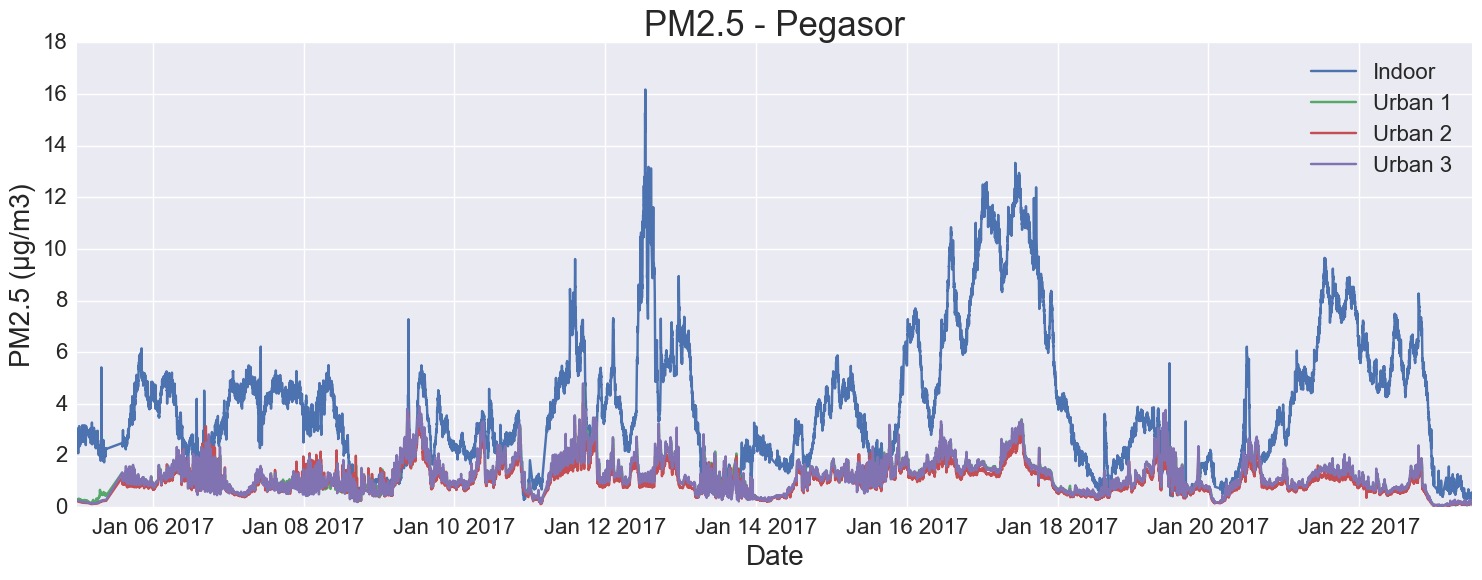

In [301]:
plt.figure(figsize=(18,6))
#plt.plot(df2['datetime'],df2['PM2.5_MC (ug/m3)'],label='TEOM (EPA)')
#plt.plot(df2['datetime'],df2['PM2.5_FEM_MC (ug/m3)'],label='TEOM-FEM_MC')
plt.plot(df2['datetime'],df2['aqi pm25 (ug/m3)'],label='Indoor')
plt.plot(df2['datetime'],df2['pm25'],label='Urban 1')
plt.plot(df2['datetime'],df2['pm25-1'],label='Urban 2')
plt.plot(df2['datetime'],df2['pm25-2'],label='Urban 3')
plt.title('PM2.5 - Pegasor', fontsize=25)
plt.xlabel('Date',fontsize=20)
plt.ylabel('PM2.5 (µg/m3)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
#plt.ylim([0,40])
plt.savefig('/Users/stella/Desktop/peg-pm.png')

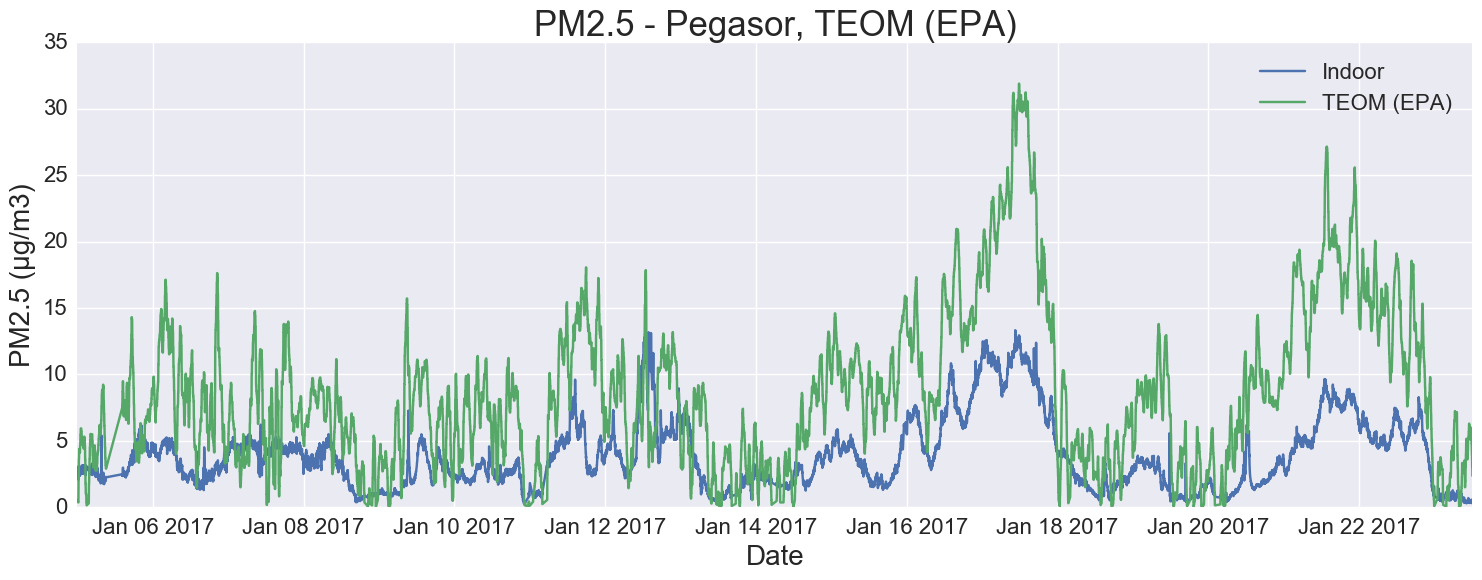

In [303]:
plt.figure(figsize=(18,6))
#plt.plot(df2['datetime'],df2['PM2.5_FEM_MC (ug/m3)'],label='TEOM-FEM_MC')
plt.plot(df2['datetime'],df2['aqi pm25 (ug/m3)'],label='Indoor')
plt.plot(df2['datetime'],df2['PM2.5_MC (ug/m3)'],label='TEOM (EPA)')
#plt.plot(df2['datetime'],df2['pm25'],label='Urban 1')
#plt.plot(df2['datetime'],df2['pm25-1'],label='Urban 2')
#plt.plot(df2['datetime'],df2['pm25-2'],label='Urban 3')
plt.title('PM2.5 - Pegasor, TEOM (EPA)', fontsize=25)
plt.xlabel('Date',fontsize=20)
plt.ylabel('PM2.5 (µg/m3)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
#plt.ylim([0,40])
plt.savefig('/Users/stella/Desktop/peg-teom-pm.png')

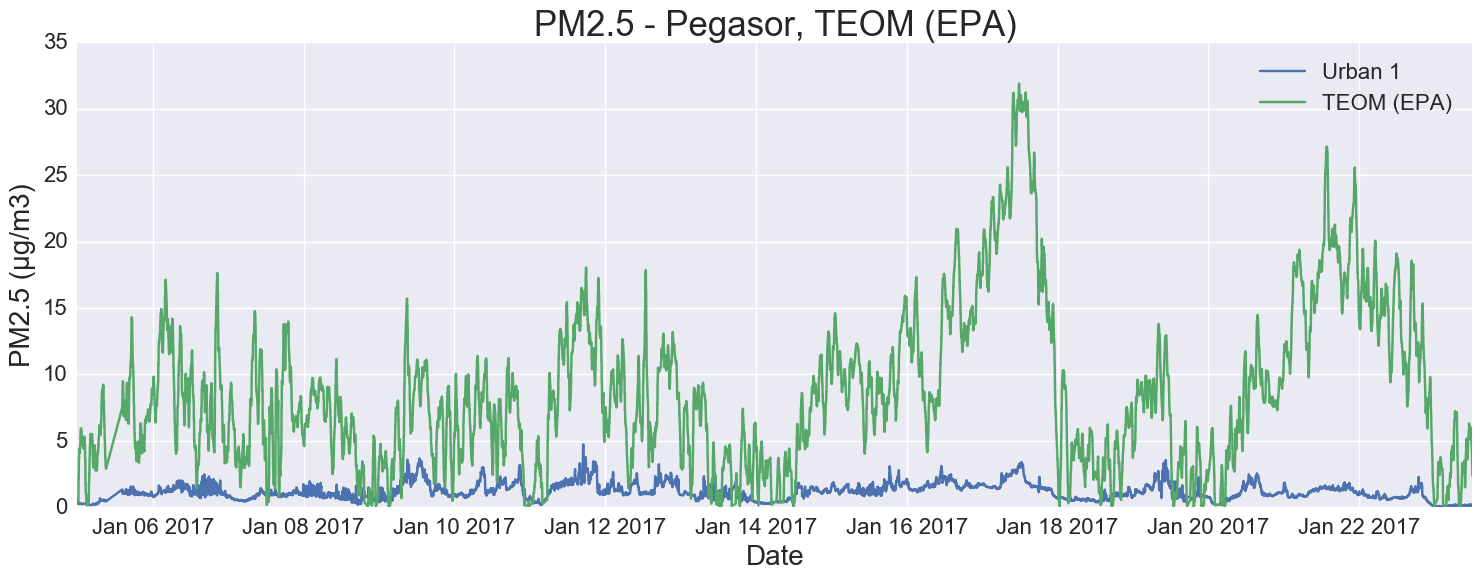

In [601]:
plt.figure(figsize=(18,6))
#plt.plot(df2['datetime'],df2['PM2.5_FEM_MC (ug/m3)'],label='TEOM-FEM_MC')
#plt.plot(df2['datetime'],df2['aqi pm25 (ug/m3)'],label='Indoor')
plt.plot(df2['datetime'],df2['pm25'],label='Urban 1')
plt.plot(df2['datetime'],df2['PM2.5_MC (ug/m3)'],label='TEOM (EPA)')
#plt.plot(df2['datetime'],df2['pm25-1'],label='Urban 2')
#plt.plot(df2['datetime'],df2['pm25-2'],label='Urban 3')
plt.title('PM2.5 - Pegasor, TEOM (EPA)', fontsize=25)
plt.xlabel('Date',fontsize=20)
plt.ylabel('PM2.5 (µg/m3)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
#plt.ylim([0,40])
#plt.savefig('/Users/stella/Desktop/peg-teom-pm-urb.png')

In [603]:
x=df2['PM2.5_FEM_MC (ug/m3)']
y=df2['pm25']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.229213468487


In [604]:
x=df2['PM2.5_FEM_MC (ug/m3)']
y=df2['aqi pm25 (ug/m3)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.608067431257


In [605]:
x=df2['aqi pm25 (ug/m3)']
y=df2['pm25']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.156742144022


In [550]:
del df3['PM10_MC (ug/m3)'], df3['PM2.5_FEM_MC (ug/m3)'], df3['PM2.5_Ref_Mass (ug/m3)']

In [552]:
del df3['PM2.5_MC (ug/m3)']

In [554]:
del df3['value (µm²/cm³)']

In [556]:
del df3['pm25'], df3['pm25-1'], df3['pm25-2'], df3['aqi pm25 (ug/m3)']

In [559]:
df3.head()

,datetime,Ultrafine (#/cm3),ldsa,num,ldsa-1,num-1,ldsa-2,num-2
0,2017-01-04 15:02:00,17800,4.499,3684.353,4.542,3308.769,4.794,3982.353
1,2017-01-04 15:03:00,17400,4.499,3684.353,4.595,3346.061,4.712,3913.317
2,2017-01-04 15:04:00,16150,4.666,3820.196,4.595,3346.061,4.712,3913.317
3,2017-01-04 15:05:00,15300,4.666,3820.196,4.362,3175.265,4.454,3697.959
4,2017-01-04 15:06:00,15550,4.666,3820.196,4.362,3175.265,4.454,3697.959


In [560]:
df3=df3[(df3['ldsa']>0) & (df3['ldsa-1']>0) & (df3['ldsa-2']>0)]
df3=df3[df3['datetime']>datetime.datetime(2017,1,5)]

In [562]:
df3=df3[df3['Ultrafine (#/cm3)']!='---']

(0, 120000)

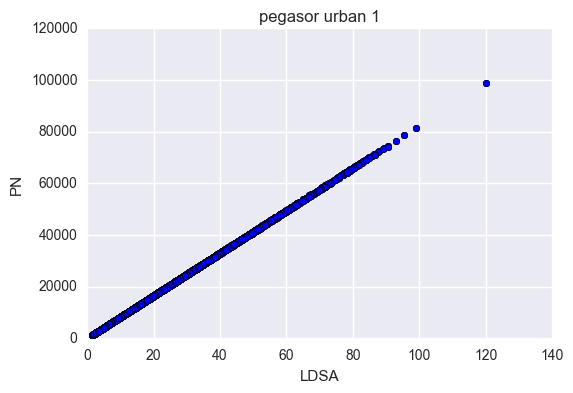

In [569]:
plt.scatter(df3['ldsa'],df3['num'])
plt.xlabel('LDSA'); plt.ylabel('PN')
plt.title('pegasor urban 1')
plt.xlim([0,140])
plt.ylim([0,120000])

In [567]:
x=df3['ldsa']
y=df3['num']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.999956912903
